In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv',sep=';')

#Descriptive Statistic

## Memeriksa kolom-kolom dan nilai hilang

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Dataset  memiliki **missing value** yaitu pada kolom Income 
* Terdapat kolom yang memiliki tipe data yang tidak sesuai (***incorrect type data***) yaitu
kolom ID seharusnya **object**

## Sampling untuk memahami data 

In [ ]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1696,1890,1971,2n Cycle,Together,42033.0,1,1,2012-09-19,95,11,...,7,0,0,0,0,0,0,3,11,0
1503,3594,1973,Master,Married,54108.0,1,1,2012-11-05,74,539,...,8,0,0,0,0,0,0,3,11,0
920,9972,1955,PhD,Together,46015.0,1,1,2014-04-13,25,38,...,7,1,0,0,0,1,0,3,11,0
1123,5025,1979,Graduation,Single,48526.0,1,0,2013-12-24,32,23,...,3,0,0,0,0,0,0,3,11,0
1934,6200,1951,Graduation,Married,75903.0,0,1,2013-04-08,50,340,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
numeric=['ID','Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response']
category=['Education','Marital_Status']
timestamp=['Dt_Customer']

In [ ]:
df[numeric].describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
df[category].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

\* Pada `df['Income']` terdapat missing value sebanyak 24 baris 

In [ ]:
for col in category:
    print(f'''Nilai kolom {col}:''')
    print(df[col].value_counts())
    print()

Nilai kolom Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Nilai kolom Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



# Univariate Analysis

<ipython-input-40-a9060098bb2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-40-a9060098bb2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-40-a9060098bb2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-40-a9060098bb2b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-40-a9060098bb2b>:4: MatplotlibDeprecationWarning: Auto-remova

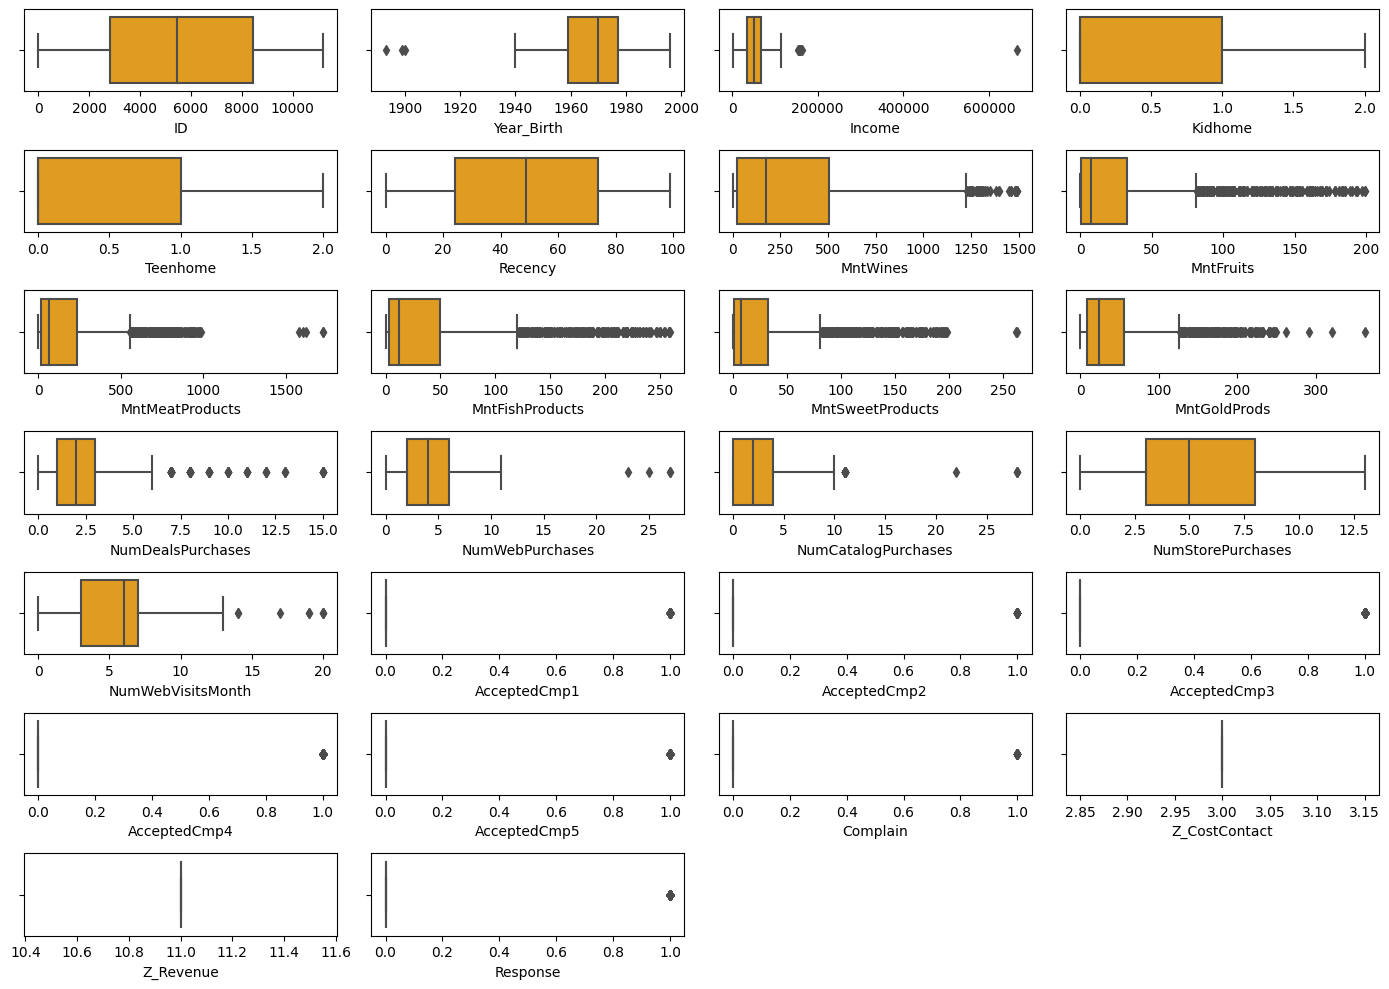

In [ ]:
fig, axes = plt.subplots(7,1, figsize=(14, 10))

for i in range(0, len(numeric)):
    plt.subplot(7,4, i+1)
    sns.boxplot(x=df[numeric[i]], color='orange', orient='h')
    plt.tight_layout()
    

# Insight Boxplot Analysis

Berdasarkan Boxplot Anlysis diatas, dapat disimpulkan bahwa ada beberapa variabel/feature yang memiliki outlier atau bernilai extreme. Berikut ini adalah beberapa feature yang memiliki outliers:
- Year Birth 'Year Birth'
- Income 'Income'
- Amount Wines 'MntWines'
- Amount Fruits 'MntFruits'
- Amount Meats Products 'MntMeatProducts'
- Amount Fish Products 'MntFishProducts'
- Amount Sweet Products 'MntSweetProducts'
- Amount Gold Products 'MntGoldProds'
- Number Delas Purchases

<ipython-input-21-fab9a7b46773>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-21-fab9a7b46773>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numeric[i]],  kde_kws = {'color':'red',
<ipython-input-21-fab9a7b46773>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide 

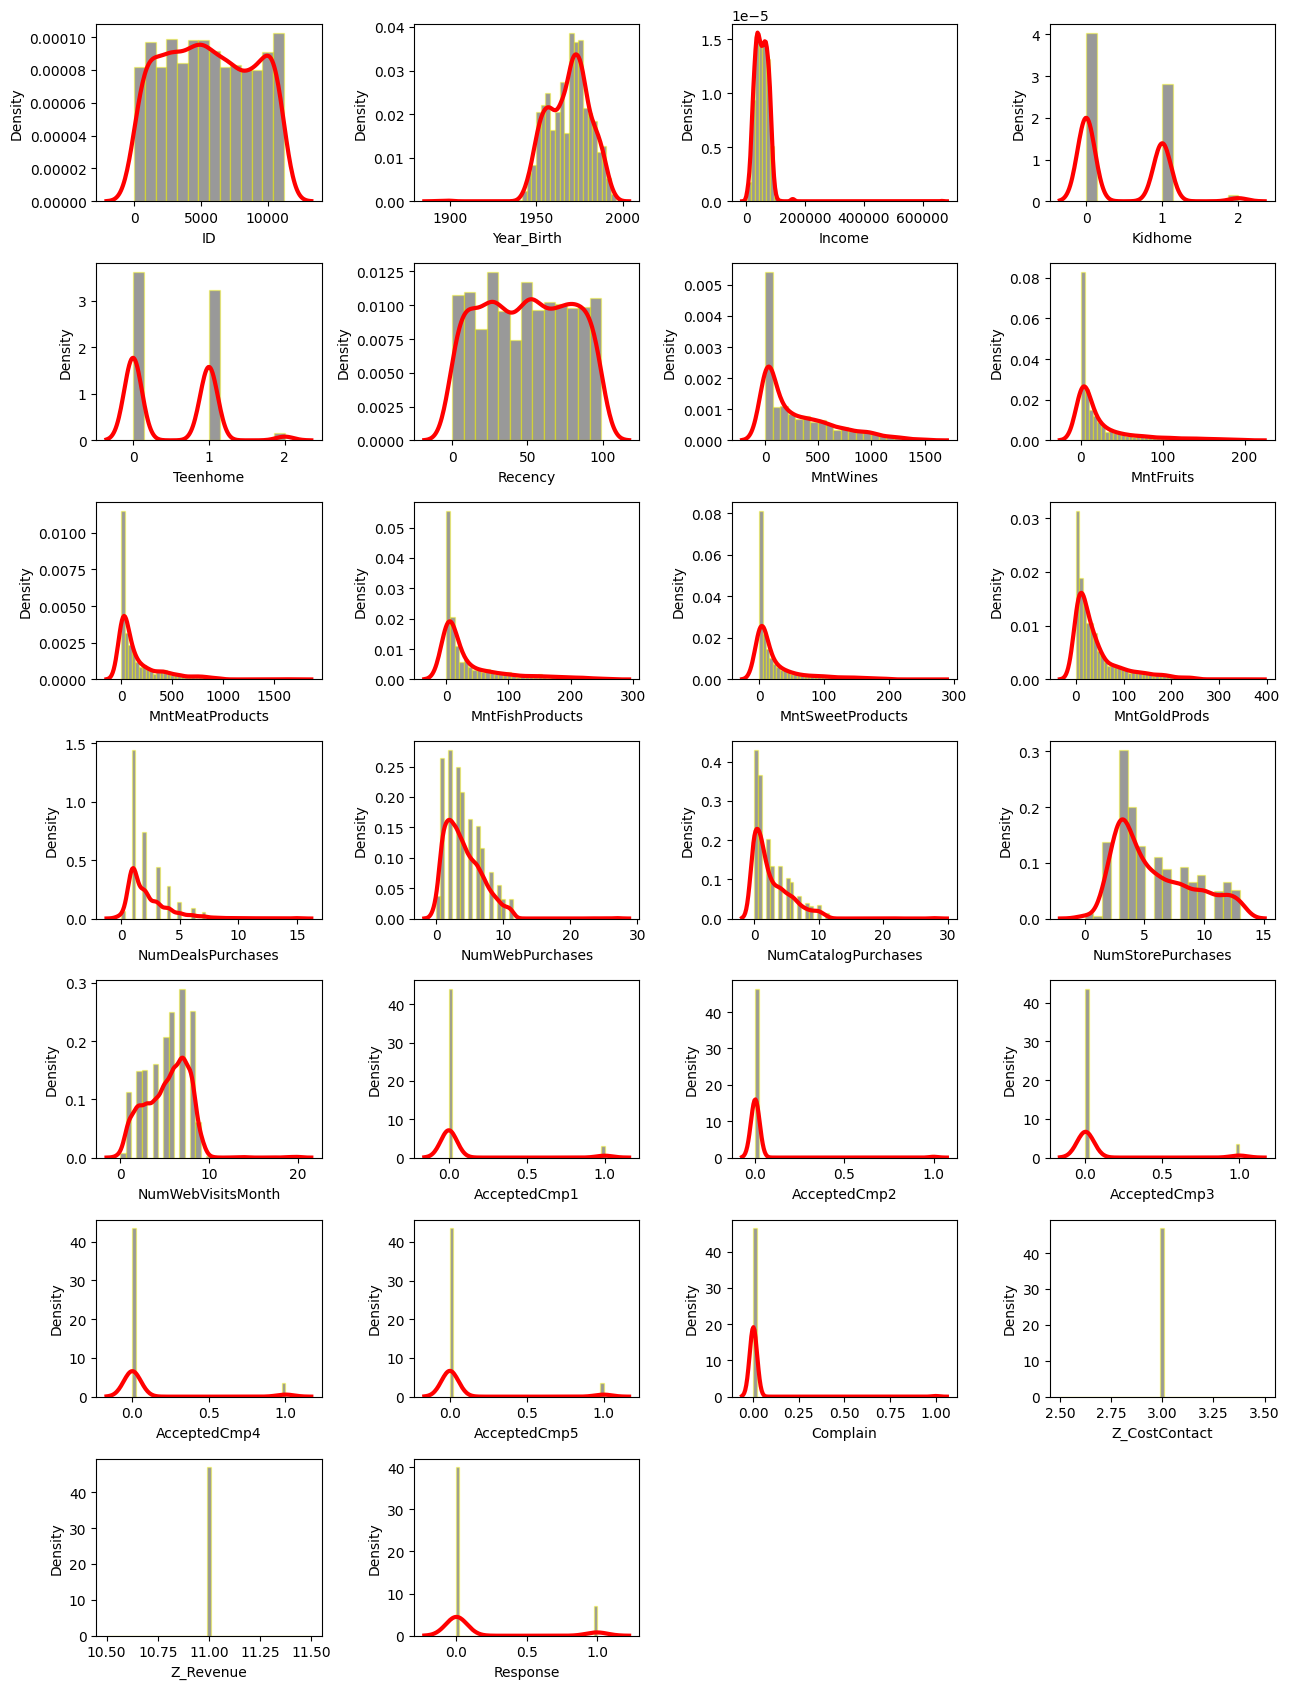

In [ ]:
fig, axes = plt.subplots(7,1, figsize=(13, 17))
for i in range(0, len(numeric)):
    plt.subplot(7,4, i+1)
    sns.distplot(df[numeric[i]],  
                 kde_kws = {'color':'red', 
                       'linewidth':3, 'linestyle':'-'},
                 hist_kws = {'color':'black','edgecolor':'yellow',
                       'linewidth':1, 'linestyle':'-'} )
    plt.tight_layout()

<ipython-input-43-21433ee6959f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-43-21433ee6959f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-43-21433ee6959f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-43-21433ee6959f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4, i+1)
<ipython-input-43-21433ee6959f>:3: MatplotlibDeprecationWarning: Auto-remova

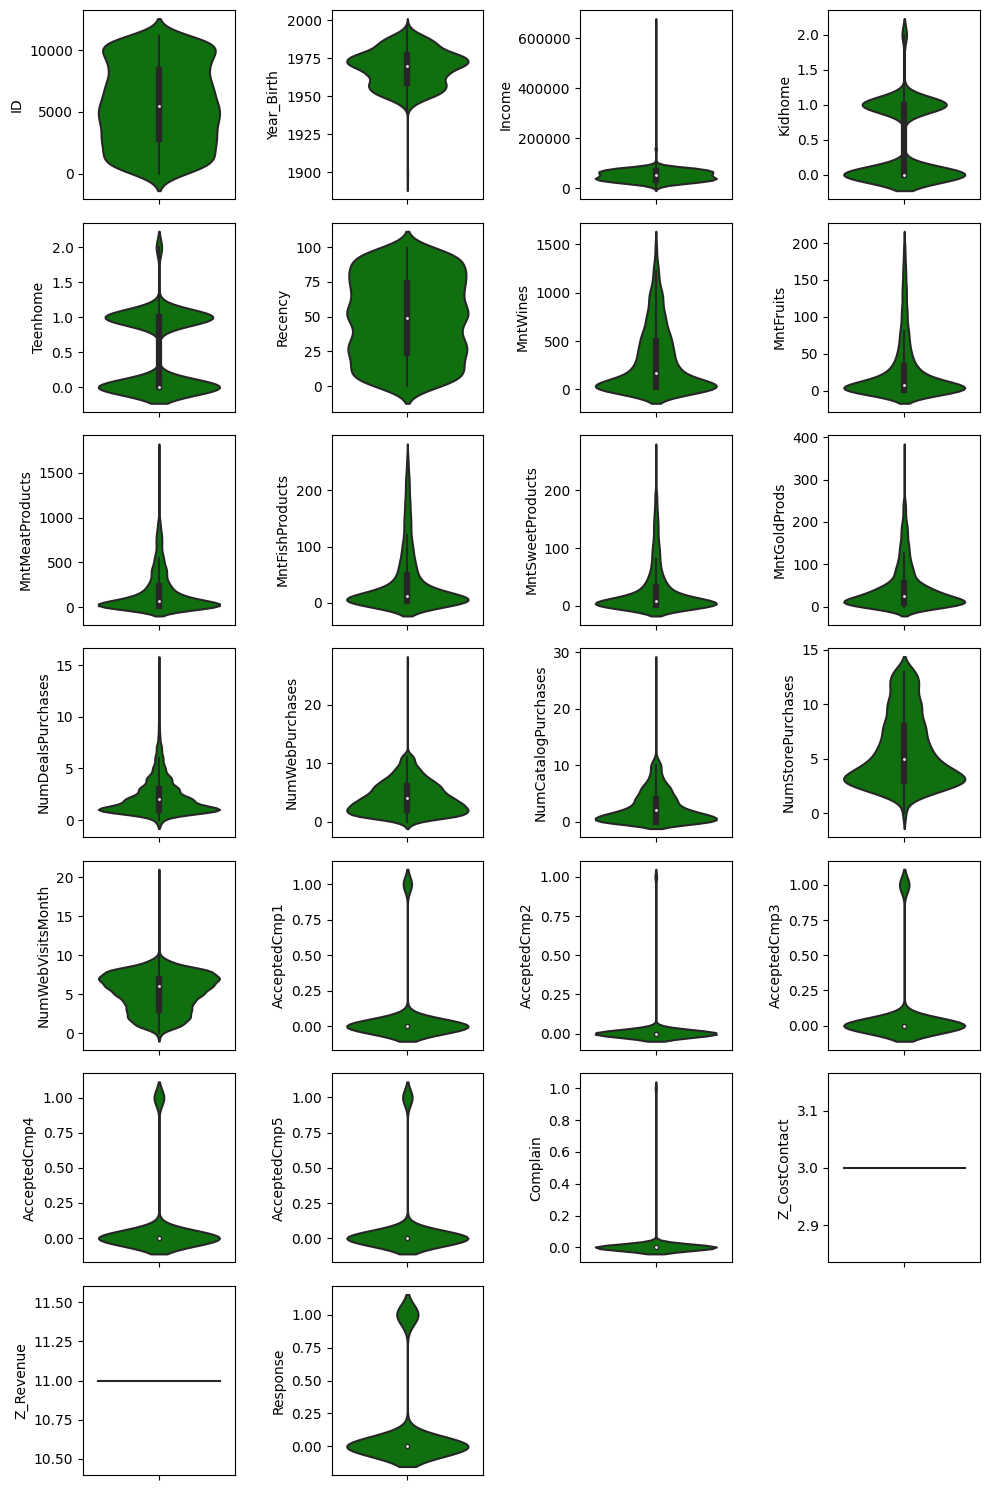

In [ ]:
fig, axes = plt.subplots(7,1, figsize=(10, 15))
for i in range(0, len(numeric)):
    plt.subplot(7,4, i+1)
    sns.violinplot(y=df[numeric[i]], color='green',orient='v')
    plt.tight_layout()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Observation Numerical Univariate Analysis


Berdasarkan chart **Boxplot, Distribusi, dan Violin** diatas, dapat diketahui bahwa ada beberapa variabel yang memiliki **outlier** didalamnya. Berikut adalah beberapa variabel tersebut:

1. ***Normal distribution***
  * `ID`
  * `Recency`
  * `NumStorePurchases`

2. ***Positive skewed distribution***
  * Income `Income`
  * Amount of Wines Products `MntWines`
  * Amount of Fruits Products `MntFruits`
  * Amount of Meats Products `MntMeatProducts`
  * Amount of Sweet Products `MntSweetProducts`
  * Amount of Fish Products `MntMeatProducts`
  * Amount of Golds Products `MntGoldProds`
  * Number Deals Purchases `NumDealsPurchases`
  * Number Web Purchases `NumWebPurchases`
  * Number Catalog Purchases `NumCatalogPurchases`
  * Number Web Visit Months `NumWebVisitsMonth`

3. ***Negative skewed distribution***
  * Year of Birth `Year_Birth`

4. ***Bimodal distribution***
 * Number of small children  in customer's household `Kidhome`
 * Number of teenagers in customer's household`Teenhome`

**Rekomendasi pada data pre-processing:**

  1. Drop kolom-kolom seperti `ID`,

  2. Data yang mengalami *positive skewed distribution* dilakukan **log-transformation** sehingga data bisa menjadi normal distribution.

  3. Membuang outlier pada `Year_Birth` menggunakan metode **Z-score**.
  
 

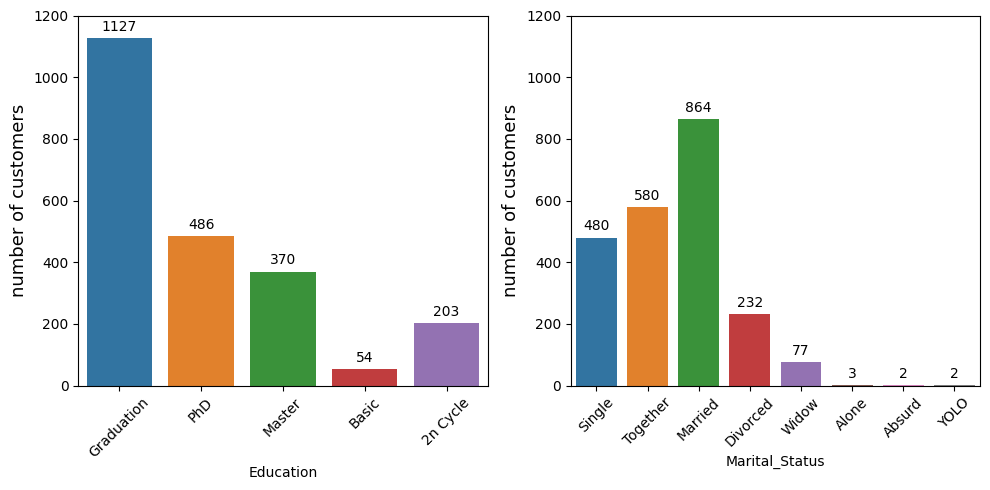

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
for i in range(0, len(category)):
    plt.subplot(1,len(category), i+1)
    bar=sns.countplot(x=df[category[i]], orient='h')
    for i in bar.patches:
      bar.annotate(int(i.get_height()),
                xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    plt.ylim(0,1200)
    plt.ylabel('number of customers',fontsize=13)
    plt.tight_layout()
  

               
        

In [ ]:
round((480/2240)*100,2)

21.43

##Observation Categorical Univariate Analysis

**Berdasarkan chart diatas, dapat disimpulkan bahwa:**
* Kategori `Education`: customer mayoritas memiliki kategori pendidikan `Graduation` sebanyak 1127 orang (50.31%). Kategori pendidikan `Basic` dan `2n Cycle` memiliki ketimpangan yang besar dibandingkan kategori lain.
* Kategori `Marital_Status`: didominasi customer yang memiliki status `Married` (38.57%),`Together`(25.89%),`Single`(21.43%). Terdapat kategori yang nilainya timpang dibandingkan lainnya yaitu `YOLO`,`Absurd`,`Alone`,`Widow`,`Divorced`.

***Rekomendasi***

>```
 Sebaran kategori yang timpang pada feature mengindikasikan ketidakgunaan feature.
Pada target, menyebabkan proses Machine Learning gagal.
 Oleh karena itu, saat data pre-processing sebaiknya di drop feature-feature tersebut atau di-exclude dari model Machine Learning.```